<a href="https://colab.research.google.com/github/harnalashok/databases/blob/main/Database_Normalization_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Last amended: 13th Feb, 2022
#For exercises, see Excel-workbook 

# Normalization
See this [link](https://stackoverflow.com/questions/246701/what-is-normalisation-or-normalization) in StackOverflow for a detailed reply to a question.  
And also see this [link](http://phlonx.com/resources/nf3/)

Database normalization is the process of structuring a database, usually a relational database, in accordance with a series of so-called normal forms in order to reduce data redundancy and improve data integrity. 

When an attempt is made to modify (update, insert into, or delete from) a relation, the following undesirable side-effects may arise in relations that have not been sufficiently normalized:

### Update anomaly

If the same information appears  on multiple rows; therefore updates to the relation may result in logical inconsistencies. For example, each record in an "Employees' Skills" relation might contain an Employee ID, Employee Address, and Skill; thus a change of address for a particular employee may need to be applied to multiple records (one for each skill). If the update is only **partially** successful – the employee's address is updated on some records but not others – then the relation is left in an *inconsistent* state. <u>Specifically, the relation provides conflicting answers to the question of what this particular employee's address is.</u> This phenomenon is known as an update anomaly.

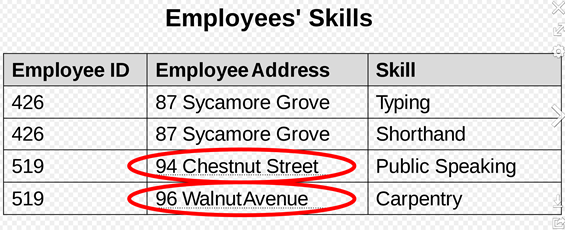

In the following table, though customerID 9876543 is repeating but it does not cause any update anomaly as any update on this row will not leave Database in an inconsistent state. On the other hand, updating branch address of '*branch*', '*Round Hill*', may leave the database in an incosistent state. So not all repetitions of data values may cause inconsitencies, but possibility exists.

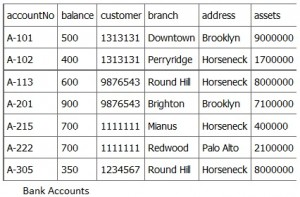

### Insertion anomaly

Insertion anomaly. There are circumstances in which certain facts cannot be recorded at all. For example, each record in a "Faculty and Their Courses" relation might contain a Faculty ID, Faculty Name, Faculty Hire Date, and Course Code. Therefore, the details of any faculty member who teaches at least one course can be recorded, but a newly hired faculty member who has not yet been assigned to teach any courses cannot be recorded, except by setting the Course Code to null. This phenomenon is known as an insertion anomaly.

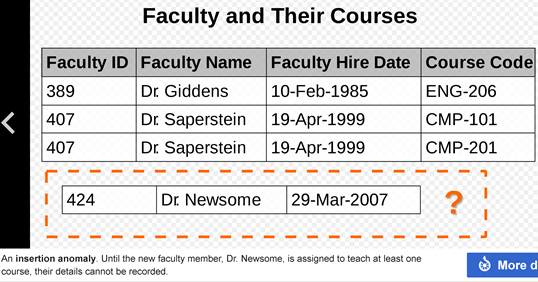

An insertion anomaly occurs when you are inserting inconsistent information into a table. When we insert a new record, such as account no. A-306 in the following figure, we need to check that the branch data is consistent with existing rows.

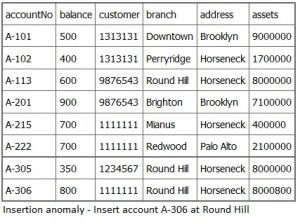

### Deletion anomaly

Deletion anomaly. Under certain circumstances, deletion of data representing certain facts necessitates deletion of data representing completely different facts. The "Faculty and Their Courses" relation described in the previous example suffers from this type of anomaly, for if a faculty member temporarily ceases to be assigned to any courses, the last of the records on which that faculty member appears must be deleted, effectively also deleting the faculty member, unless the Course Code field is set to null. This phenomenon is known as a deletion anomaly.

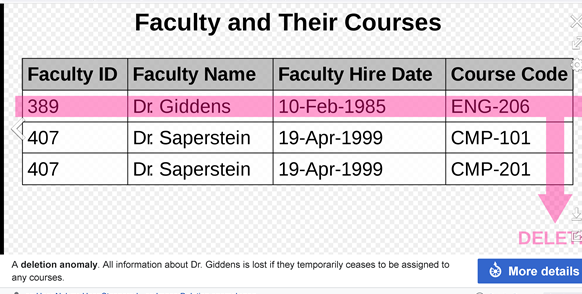

A deletion anomaly occurs when you delete a record that may contain attributes that shouldn’t be deleted. For instance, if we remove information about the last account at a branch, such as account A-101 at the Downtown branch in the following figure,  all of the branch information disappears.

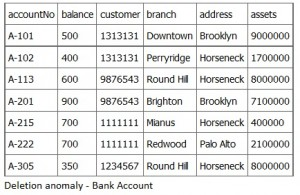

Before we learn to solve the above problems, let us view other database models.

## Properties of a Relation

In database systems relations are represented as tables. The relation view implies some constraints on the tables:

> 1. No duplicate rows. In practice, this is ensured by defining one or more columns as primary keys.<br>
> 2. Rows do not have an intrinsic order. While tables have to be stored and presented in some order, this is unstable and implementation dependent. If a specific ordering need to be represented, it has to be in the form of data, e.g. a "number" column.
> 3. Columns have unique names within the same table.
> 4. Each column has a domain (or data type) which defines the allowed values in the column.
> 5. All rows in a table have the same set of columns.

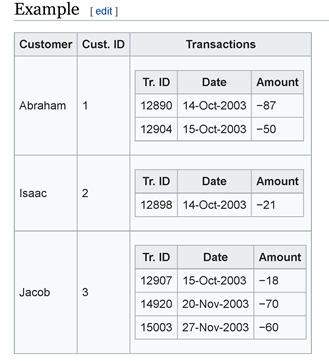

This table represent a relation where one of the columns (Transactions) is itself relation-valued. This is a valid relation but does not conform to rules of normalization which does not allow nested relations. The table is therefore unnormalized.

### Normalization process

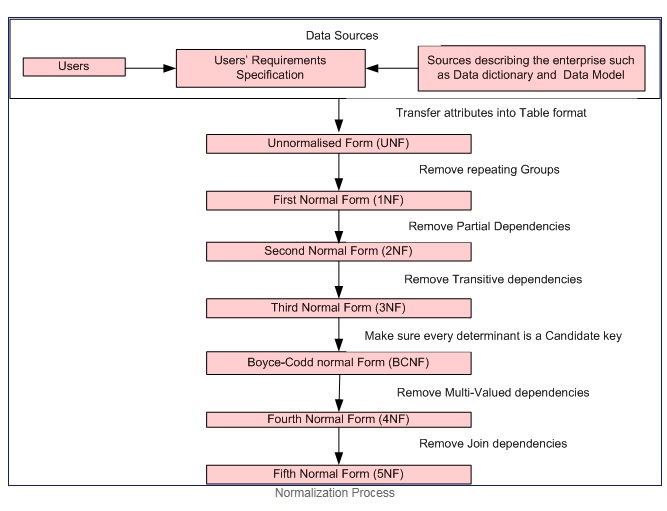

##1NF

Database normalization is the process of representing a database in terms of relations in *standard normal forms*, where first normal is a minimal requirement.

First normal form (1NF) is a property of a relation in a relational database. A relation is in first normal form if and only if:  

* No attribute has relations as elements. Or more informally, that no table column can have tables as values.  
* And there are no repeating groups.  

If a relation contains a composite or multi-valued attribute, it violates the first normal form, or the relation is in first normal form if it does not contain any composite or multi-valued attribute. Database systems which do not require first normal form are often called **no sql** systems.

The rationale for normalizing to 1NF:  

>1. **Simple Data structure storage**: Allows presenting, storing and interchanging relational data in the form of regular two-dimensional arrays. Supporting nested relations would require more complex data structures.  
>2. **Simple data language**: Simplifies the data language, since any data item can be identified just by relation name, attribute name and key. Supporting nested relations would require a more complex language.  
>3. **Structure can be changed**: The database is more resilient to structural changes over time.  
>4. **Can be normalized further**: Makes further normalization levels possible which eliminate data redundancy and anomalies

This table over customers' credit card transactions does not conform to first normal form:

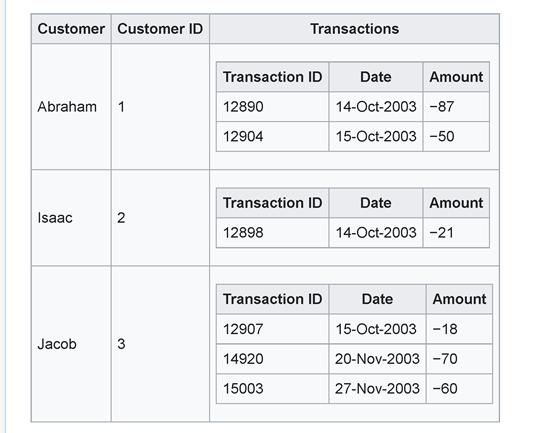

The automated evaluation of any query relating to customers' transactions would broadly involve two stages:

>Unpacking one or more customers' groups of transactions allowing the individual transactions in a group to be examined, and  
> Deriving a query result based on the results of the first stage

For example, in order to find out the monetary sum of all transactions that occurred in October 2003 for all customers, the system would have to know that it must first unpack the *Transactions* group of each customer, then sum the *Amounts* of all transactions thus obtained where the *Date* of the transaction falls in October 2003.

The folowing table contains groups of values in a cell.

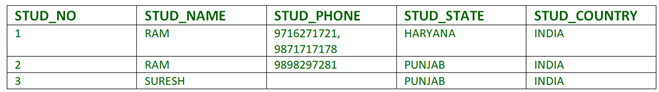

Normalization (to first normal form) is a process where attributes with non-simple domains are extracted to separate stand-alone relations. The extracted relations are amended with foreign keys referring to the primary key of the relation which contained it. 

In this example, Customer ID is the primary key of the containing relations and will therefore be appended as foreign key to the new relation:

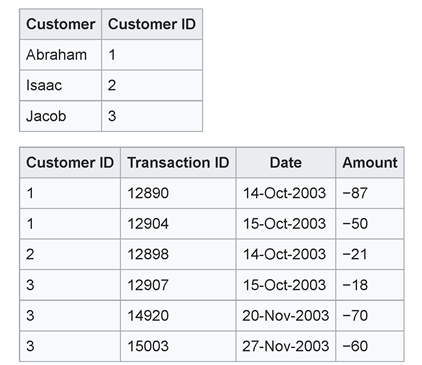

In the modified structure, the primary key is {Customer ID} in the first relation, {Customer ID, Transaction ID} in the second relation.

The INF normalized form of IInd table above is as follows:

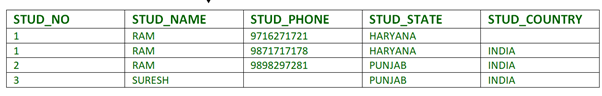

According to C.J.Date's definition, a table is in first normal form if and only if it is "isomorphic to some relation", which means, specifically, that it satisfies the following five conditions:<br>

>1. There's no top-to-bottom ordering to the rows.<br>
>2. There's no left-to-right ordering to the columns.<br>
>3. There are no duplicate rows.<br>
>4. Every row-and-column intersection contains exactly one value from the applicable domain (and nothing else).<br>
>5. All columns are regular [i.e. rows have no hidden components such as row IDs, object IDs, or hidden timestamps].

Violation of any of these conditions would mean that the table is not strictly relational, and therefore that it is not in first normal form.

## 2NF
Refer [here](https://condor.depaul.edu/gandrus/240IT/lectures/1NF-to-2NF.htm)

A relation is in the second normal form if it fulfills the following two requirements:

> It is in first normal form.<br>
> It does not have any non-prime attribute that is functionally dependent on any subset of any candidate key of the relation. 

A non-prime attribute of a relation is an attribute that is not *a part* of any candidate key of the relation.<br>

Put simply, a relation is in 2NF if it is in 1NF and every non-prime attribute of the relation is dependent on the *whole* of every candidate key. Note that it does not put any restriction on the non-prime to non-prime attribute dependency. That is addressed in third normal form.

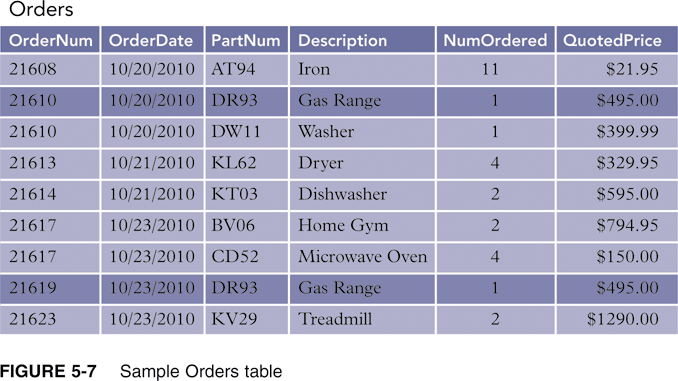

Let's take a look at the Orders table given in above figure. The description of a specific part (DR93, for example) occurs twice in the table. This redundancy causes several problems. It is wasteful of space, but more serious are the update anomalies that they cause.

> Making a change to a part description may require changes in many rows - more work, more time, more complicated logically, increased chance of human error.  

> A part that appears in many rows could have many different descriptions. This causes inconsistencies, for example, how would we find all of the information pertaining to a part given just its description.  

> The primary key in this table is (*OrderNum, PartNum*). So if we wanted to insert a new part into the table, how would we do it if there were not yet any orders for the part, i.e., what would we enter for *OrderNum*?  

> What if we deleted an order. For example, what if order 21608 were deleted? Then we would lose information about part AT94 - you would no longer know that part AT94 is an Iron.

Why do all these anomalies exist?  
If you think about each of the four situations given above, you'll realize that what is causing the problems is that the attribute *Description* depends on *PartNum*, but not on *OrderNum*.
That is the 2NF condition we call **partial dependency**.

Here is an algorithm for removing partial dependencies.  
> 1. Form all subsets of the attributes making up the primary key.  
> 2. Begin a new table for each subset, using the subset as the primary key.  
> 3. Now, from the original table, add to each subset the attributes that depend on that subsets primary key.  
> 4. Name each of the new tables appropriately.

Let's see how this works for our *Orders* table. Remember, the primary key there was (<u>OrderNum, PartNum</u>). So after steps 1 and 2 we have three subsets (as tables):  
<u>
(OrderNum,  
(PartNum,  
(OrderNum, PartNum,</u>  

Applying step 3: *OrderDate* only depends on *OrderNum*, so it gets put in the first subset (table). Description only depends on PatNum, so it gets put in the second subset. Both NumOrdered and QuotedPrice depend on <u>OrderNum</u> and <u>PartNum</u>, so they get put in the third subset. This, we get the resulting three tables:

(<u>OrderNum</u>, OrderDate)  
(<u>PartNum</u>, Description)  
(<u>OrderNum, PartNum</u>, NumOrdered, QuotedPrice)    

And now, after naming the tables we have:

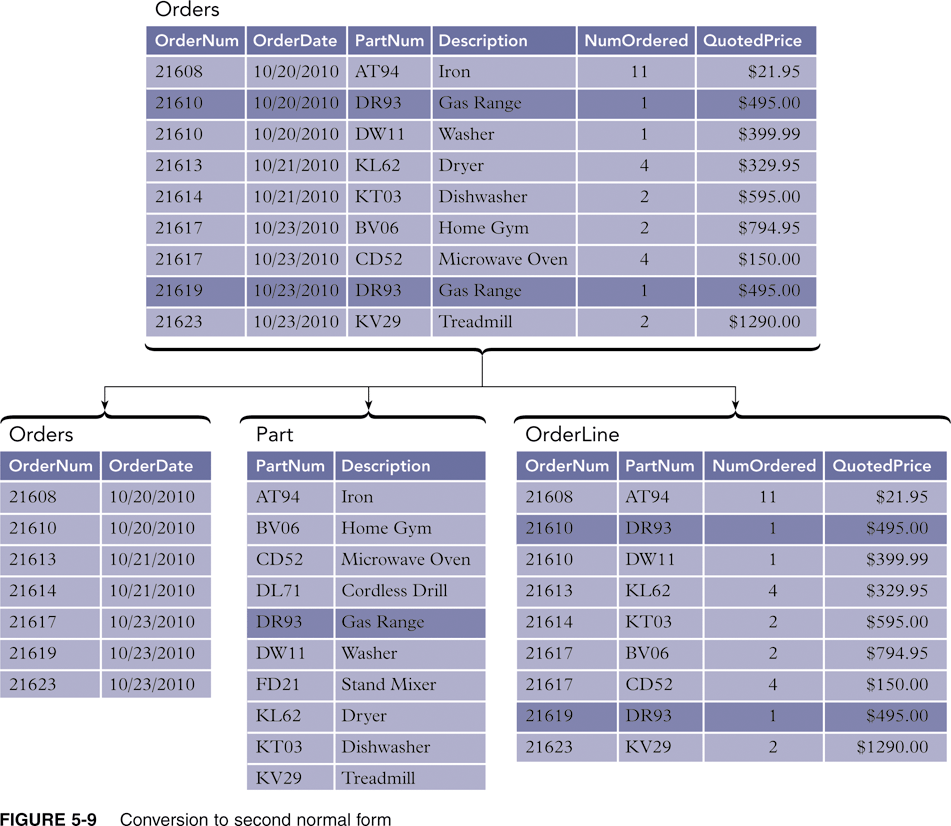

Bring the following table in 2NF

image.png

## 3NF
Refer [here](https://condor.depaul.edu/gandrus/240IT/lectures/2NF-to-3NF.htm)

Read CustomerName as ClientName. LastName, FirstName and RepNum are of Sales Rep who is selling goods to client.  

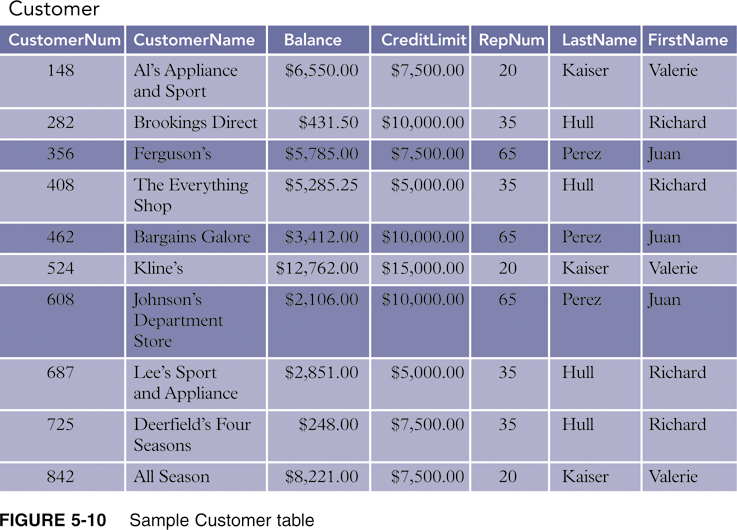

The same set of problems exist in the above table here as did in our *Orders* table.

> Making a change to the name of a sales rep may require changes in many rows.
 
> A rep's name that appears in many rows could have many different spellings.
 
> To add a new sales rep he/she would already have to have been assigned to a customer. This is not realistic.
 
> Deleting all customers represented by a given sales rep would cause one to lose all the information pertaining to that sales rep.

Again, why do all these anomalies exist?  
In this case it is because the nonkeys, *LastName* and *FirstName* depend on *RepNum*. But *RepNum* is not the primary key. This is the 3NF condition we call **transitive dependency**.

Our author calls an attribute like *RepNum* a determinant because it determines other attributes.

To remove transitive dependencies.  

> 1. For each determinant that is not a candidate key*, remove from the table the columns that depend on this determinant (but don't remove the determinant).
> 2. Create a new table containing all the columns from the original table that depend on this determinant.
> 3. Make the determinant the primary key of this new table.
> 4. Name the new table appropriately.  

* A candidate key is any key that could serve as a primary key.

For the *Customer* table, you would remove *LastName* and *FirstName* because they depend on the determinant *RepNum*, which is not a candidate key. A new table is formed, consisting of *RepNum* (as primary key), *LastName*, and *FirstName*:  

> Customer (<u>CustomerNum</u>, CustomerName, Balance, CreditLimit, RepNum)  
> Rep (<u>RepNum</u>, LastName, FirstName)

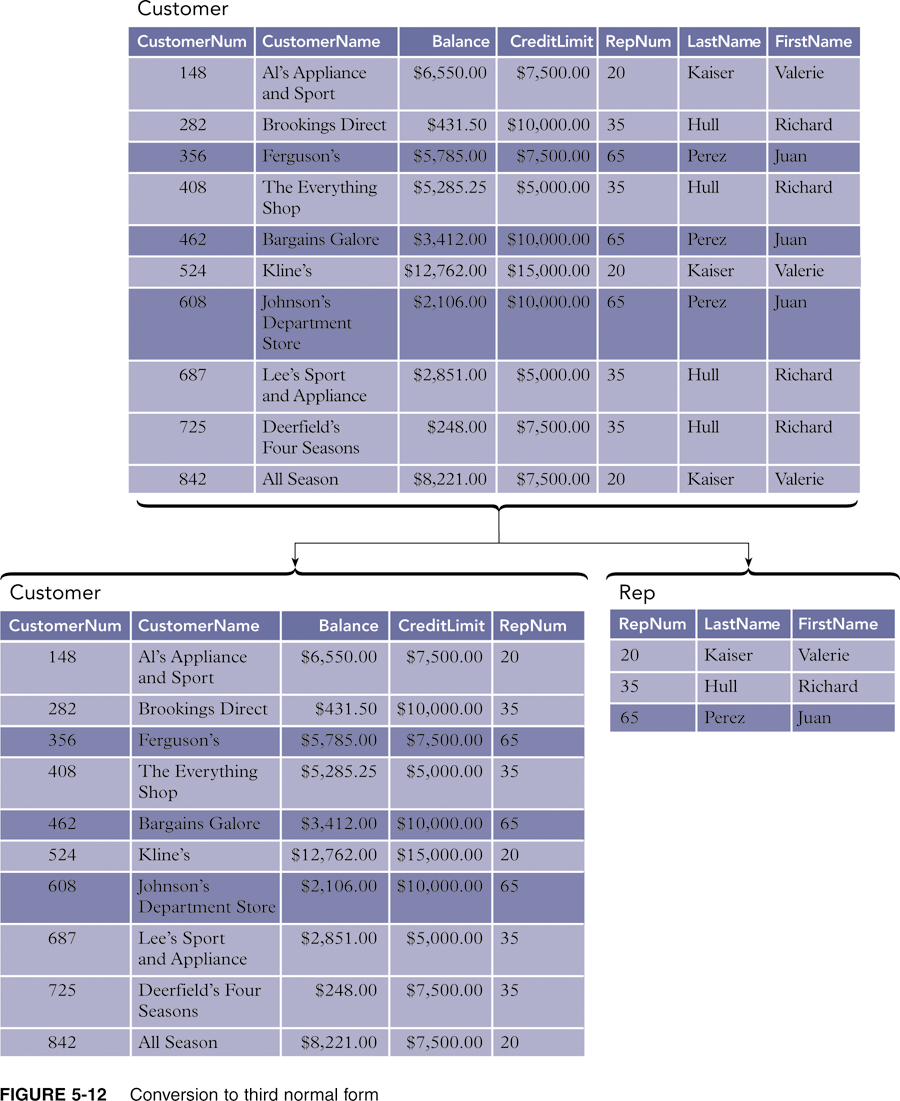

The following 2NF table fails to meet the requirements of 3NF

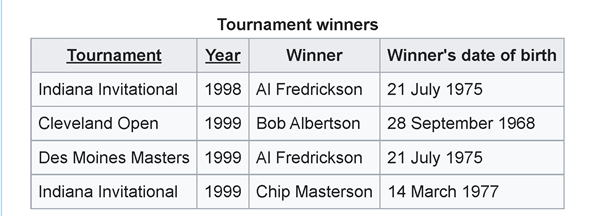

Because each row in the table needs to tell us who won a particular Tournament in a particular Year, the composite key {Tournament, Year} is a minimal set of attributes guaranteed to uniquely identify a row. That is, {Tournament, Year} is a candidate key for the table.  

The breach of 3NF occurs because the non-prime attribute (Winner's date of birth) is transitively dependent on the candidate key {Tournament, Year} through the non-prime attribute Winner. The fact that Winner's date of birth is functionally dependent on Winner makes the table vulnerable to logical inconsistencies, as there is nothing to stop the same person from being shown with different dates of birth on different records.  

In order to express the same facts without violating 3NF, it is necessary to split the table into two:  

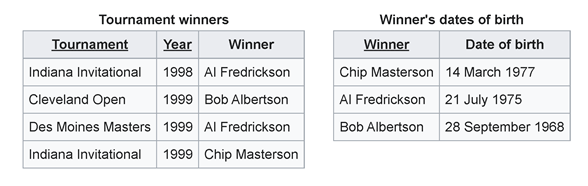

Update anomalies cannot occur in these tables, because unlike before, Winner is now a candidate key in the second table, thus allowing only one value for Date of birth for each Winner.

## Beyond 3NF

Most 3NF tables are free of update, insertion, and deletion anomalies. Certain types of 3NF tables, rarely met with in practice, are affected by such anomalies; these are tables which either fall short of Boyce–Codd normal form (BCNF) or, if they meet BCNF, fall short of the higher normal forms 4NF or 5NF.

In [ ]:
############# I am done #############